<a href="https://colab.research.google.com/github/sskboonmee/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means

### Generate  Data 

In [1]:
from sklearn.datasets import make_blobs #make_blobs=สร้าง Data เป็นกลุ่มๆ

In [4]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6) #centerจุดศูนย์กลางกลุ่ม n_feature ให้มีฟีเจอร์กี่ตัว

### Explore data

In [5]:
X.shape #500จุด2ฟีเจอร์

(500, 2)

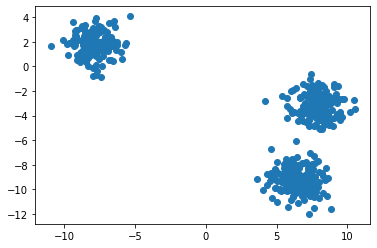

In [6]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

y = คำตอบ


###Clustering

####Import

In [7]:
from sklearn.cluster import KMeans

####Define

In [8]:
kmeans = KMeans(n_clusters=2, random_state=6)

####Train-Predict

In [13]:
y_clust = kmeans.fit_predict(X)

In [14]:
y_clust  #dataแต่ละตัวมีกลุ่มบอกว่าอยู่กลุ่มไหน

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

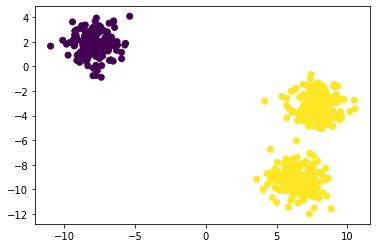

In [15]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

3 Clusters

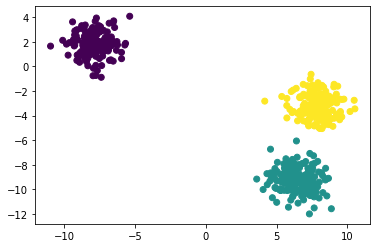

In [17]:
#Define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 Clusters

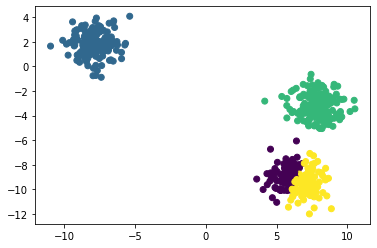

In [18]:
#Define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

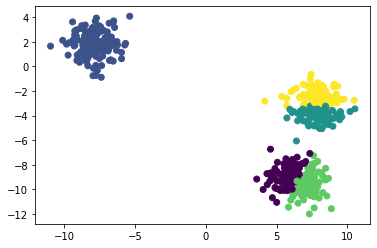

In [19]:
#Define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

Example Application (Color Quantization)

In [21]:
import cv2
import os

In [23]:
img = cv2.imread('/content/tours.jpg')

In [24]:
img.shape

(332, 415, 3)

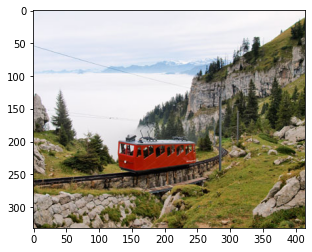

In [25]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

#นับจำนวนสี

In [26]:
import numpy as np

In [31]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(56665, 3)

จัดกลุ่มให้มี 16 สี

In [35]:
myquantize = KMeans(n_clusters=16,random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [36]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(137780, 3)

In [38]:
final_color = myquantize.fit_predict(img_row)

ใช้ centroid เป็นตัวแทนของสี

In [39]:
centroid = myquantize.cluster_centers_

In [40]:
centroid

array([[187.83558101, 176.2841308 , 167.00351007],
       [ 85.51713487,  82.42726872,  68.28136491],
       [240.85668535, 240.27370468, 245.37186892],
       [132.34571273, 120.95117422,  52.58864009],
       [ 20.05230712,  19.41528115,  10.35587521],
       [141.22050843, 131.1101114 , 118.41616681],
       [114.42970554, 106.73354503,  92.06726328],
       [154.37184116,  30.74115523,  11.10433213],
       [ 45.64252957,  44.75440502,  22.92481294],
       [ 60.59906729,  60.3502998 ,  45.94123917],
       [108.47464875, 101.83628589,  42.30812462],
       [182.85334105, 202.62481921, 222.3043101 ],
       [166.914096  , 153.15313321, 139.05920598],
       [ 80.58042933,  77.06453861,  30.03554502],
       [154.40693756, 134.48503469,  75.15004955],
       [223.98576797, 229.16550732, 240.46621892]])

แทนสีคืนลงไป

In [41]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

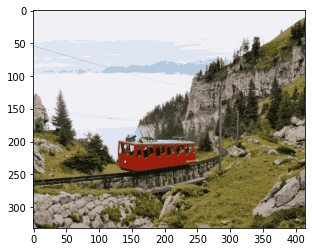

In [42]:
plt.imshow(new_img/255)

In [43]:
plt.imsave('img.jpg',new_img/255)

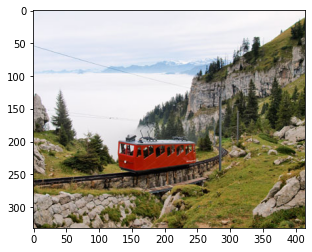

In [44]:
plt.imshow(RGB_img)